In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# 1. Data Loading and Preprocessing

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

train_set=torchvision.datasets.MNIST(root='./mnist',train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_set = torchvision.datasets.MNIST('./mnist', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32,shuffle=False)

## 2. Sanity Check to verify whether labels are named correctly or not

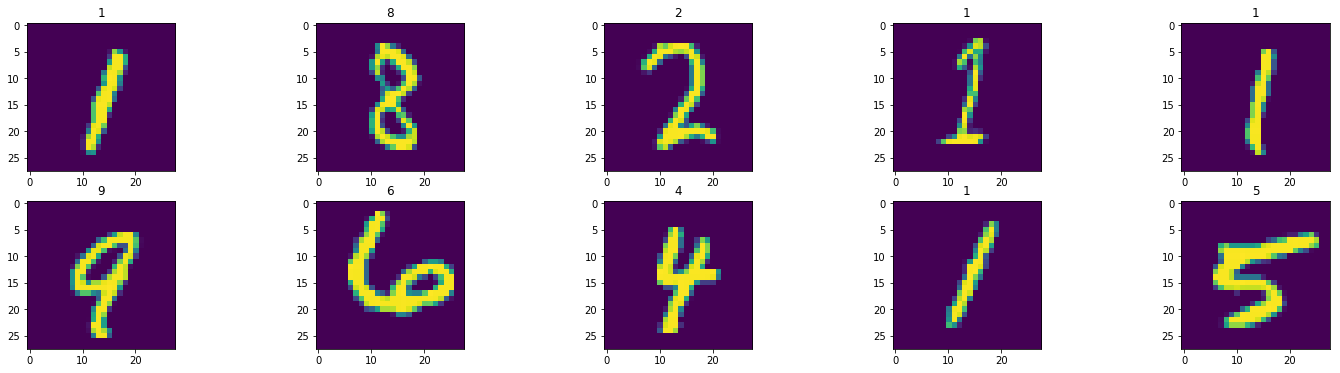

In [3]:
x,y=iter(train_loader).next()
fig=plt.figure(figsize=(25,6))
for i in range(1,11):
    ax=fig.add_subplot(2,5,i)
    ax.imshow((x[i-1]/2+0.5).squeeze())
    ax.set_title(y[i-1].item())

# 3.1  Convolution Neural Network Model- 1

In [49]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,16,7)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 11 * 11, 150)
        self.fc2 = nn.Linear(150, 80)
        self.fc3 = nn.Linear(80, 10)
        self.dropout=nn.Dropout(0.2)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=x.view(-1,16*11*11)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        return x
        

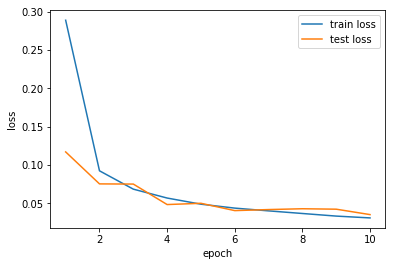

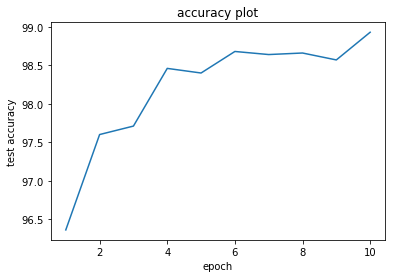

In [50]:
model=Model()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.6)

epochs=10
train_loss_epoch=[]
test_loss_epoch=[]
test_acc_epoch=[]
best_loss=np.inf
for epoch in range(epochs):
    train_loss=0.0
    model.train()
    for i,data in enumerate(train_loader):
        inputs,labels=data
        optimizer.zero_grad()#zero graident buffers
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        loss.backward() # backpropagate
        optimizer.step()# update weights
        train_loss+=loss.item()
    train_loss_epoch.append(train_loss/len(train_loader))
    
    model.eval()
    test_loss=0.0
    correct_count=0
    for i,data in enumerate(test_loader):
        inputs,labels=data
        outputs=model(inputs)
        _,predicted = torch.max(outputs, 1)
        correct_count+=(predicted==labels).sum().item()
        loss=criterion(outputs,labels)
        test_loss+=loss.item()
    if best_loss>test_loss:
        torch.save(model,'best_model.pth')
        best_loss=test_loss
    test_loss_epoch.append(test_loss/len(test_loader))
    test_acc_epoch.append(correct_count*100/len(test_loader.dataset))

            
plt.plot(range(1,epochs+1),train_loss_epoch,label='train loss')
plt.plot(range(1,epochs+1),test_loss_epoch,label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(range(1,epochs+1),test_acc_epoch)
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.title('accuracy plot')
plt.show()
    
        
        

# 3.2 checking how model is performing on different classes

In [51]:
model=torch.load('best_model.pth')
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(len(labels)):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 98 %
Accuracy of     4 : 99 %
Accuracy of     5 : 98 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 97 %


# 4.1  Convolution Neural Network Model- 2

In [9]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,6,3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 14, 3)
        self.conv3 = nn.Conv2d(14,28,3,padding=1)
        self.fc1 = nn.Linear(28 * 5 * 5, 140)
        self.fc2 = nn.Linear(140, 74)
        self.fc3 = nn.Linear(74, 10)
        self.dropout=nn.Dropout(0.2)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=F.relu(self.conv2(x))
        x=self.pool(x)
        x=self.dropout(x)
        x=F.relu(self.conv3(x))
        x=x.view(-1,28*5*5)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        return x
        
        

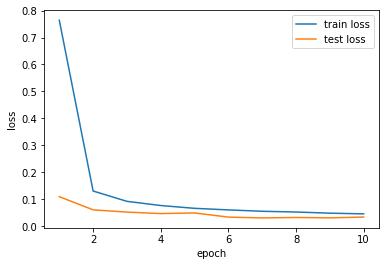

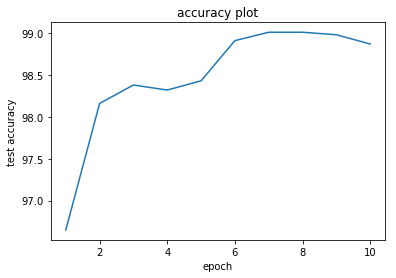

In [10]:
model=Model()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.6)

epochs=10
train_loss_epoch=[]
test_loss_epoch=[]
test_acc_epoch=[]
best_loss=np.inf
for epoch in range(epochs):
    train_loss=0.0
    model.train()
    for i,data in enumerate(train_loader):
        inputs,labels=data
        optimizer.zero_grad()#zero graident buffers
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        loss.backward() # backpropagate
        optimizer.step()# update weights
        train_loss+=loss.item()
    train_loss_epoch.append(train_loss/len(train_loader))
    
    model.eval()
    test_loss=0.0
    correct_count=0
    for i,data in enumerate(test_loader):
        inputs,labels=data
        outputs=model(inputs)
        _,predicted = torch.max(outputs, 1)
        correct_count+=(predicted==labels).sum().item()
        loss=criterion(outputs,labels)
        test_loss+=loss.item()
    if best_loss>test_loss:
        torch.save(model,'best_model.pth')
        best_loss=test_loss
    test_loss_epoch.append(test_loss/len(test_loader))
    test_acc_epoch.append(correct_count*100/len(test_loader.dataset))

            
plt.plot(range(1,epochs+1),train_loss_epoch,label='train loss')
plt.plot(range(1,epochs+1),test_loss_epoch,label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(range(1,epochs+1),test_acc_epoch)
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.title('accuracy plot')
plt.show()
    

# 4.2 checking how model is performing on different classes

In [11]:
model=torch.load('best_model.pth')
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(len(labels)):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 98 %
Accuracy of     5 : 99 %
Accuracy of     6 : 99 %
Accuracy of     7 : 98 %
Accuracy of     8 : 98 %
Accuracy of     9 : 98 %


# 5.  Convolution Neural Network Model- 3

In [43]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,12,5,padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5,padding=2)
        self.conv3 = nn.Conv2d(16,32,5,padding=2)
        self.conv4=nn.Conv2d(32,64,5,padding=2)
        self.conv5=nn.Conv2d(64,128,5,padding=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 70)
        self.fc3 = nn.Linear(70, 10)
        self.dropout=nn.Dropout(0.2)
        self.batchnorm=nn.BatchNorm2d(16)
    def forward(self,x):
        x=F.relu(self.conv1(x))
        x=self.pool(x)
        x=F.relu(self.conv2(x))
        x=self.batchnorm(x)
        x=F.relu(self.conv3(x))
        x=self.pool(x)
        x=self.dropout(x)
        x=F.relu(self.conv4(x))
        x=F.relu(self.conv5(x))
        x=x.view(-1,128*7*7)
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        return x
        

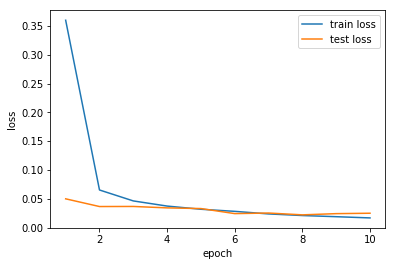

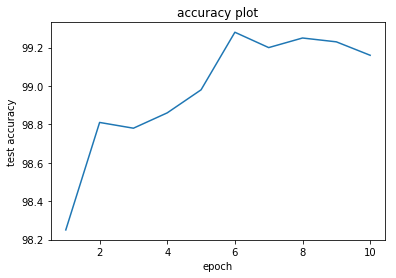

In [45]:
model=Model()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01,momentum=0.6)

epochs=10
train_loss_epoch=[]
test_loss_epoch=[]
test_acc_epoch=[]
best_loss=np.inf
for epoch in range(epochs):
    train_loss=0.0
    model.train()
    for i,data in enumerate(train_loader):
        inputs,labels=data
        optimizer.zero_grad()#zero graident buffers
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        loss.backward() # backpropagate
        optimizer.step()# update weights
        train_loss+=loss.item()
    train_loss_epoch.append(train_loss/len(train_loader))
    
    model.eval()
    test_loss=0.0
    correct_count=0
    for i,data in enumerate(test_loader):
        inputs,labels=data
        outputs=model(inputs)
        _,predicted = torch.max(outputs, 1)
        correct_count+=(predicted==labels).sum().item()
        loss=criterion(outputs,labels)
        test_loss+=loss.item()
    if best_loss>test_loss:
        torch.save(model,'best_model.pth')
        best_loss=test_loss
    test_loss_epoch.append(test_loss/len(test_loader))
    test_acc_epoch.append(correct_count*100/len(test_loader.dataset))

            
plt.plot(range(1,epochs+1),train_loss_epoch,label='train loss')
plt.plot(range(1,epochs+1),test_loss_epoch,label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.plot(range(1,epochs+1),test_acc_epoch)
plt.xlabel('epoch')
plt.ylabel('test accuracy')
plt.title('accuracy plot')
plt.show()
    

# 5.2 checking how model is performing on different classes

In [46]:
model=torch.load('best_model.pth')
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in test_loader:
    inputs, labels = data
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels)
    for i in range(len(labels)):
        label = labels[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 99 %
Accuracy of     6 : 98 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 99 %
